In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import matplotlib
import re
from datetime import datetime
from wordcloud import WordCloud 
import jieba
import jieba.analyse
from datetime import date
import re
import string
from wordcloud import WordCloud 

### ÂâçËôïÁêÜ

In [2]:
df_ = pd.read_csv('./ÂØ¶ÁøíÂøÉÂæó_detail.csv')
df_.drop('Unnamed: 0', axis=1,inplace=True)
print(df_.shape)

(3494, 8)


In [3]:
df_ = df_[~df_['content'].isna()].reset_index(drop='index')

In [3]:
text = df_.loc[5,'content']
text

'„ÄåË°åÈä∑ÁÅ´Êòü‰∫∫Ë®àÁï´„ÄçÊö®‰ºÅÊ•≠ÂØ¶Áøí„ÄÇ È°õË¶Ü‰Ω†Â∞çÂïÜÂ≠∏ÁêÜË´ñÁöÑÊÉ≥ÂÉè„ÄÇ #‰ºÅÊ•≠‰∫îÁÆ°ÊäÄËÉΩ„ÄÇ ÂÆåÂÖ®ÂâµÊñ∞ÁöÑ #Ë°åÈä∑ÂØ¶Áøí„ÄÇ https://lihi3.cc/C57gb„ÄÇ ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî„ÄÇ ÂçóÂ±±‰∫∫Â£ΩÈ†ÜÊ©ôÈÄöË®äËôï112Âπ¥ „ÄåË°åÈä∑ÁÅ´Êòü‰∫∫Ë®àÁï´„ÄçÊö®‰ºÅÊ•≠ÂØ¶Áøí„ÄÇ ÂØ¶Áøí‰∏ªËª∏:„ÄÇ Ë°åÈä∑ÁÅ´Êòü‰∫∫Ë®àÁï´Ê¶ÇÂøµ:„ÄÇ „ÄåÂÉπÂÄºË°åÈä∑ËàáÁ≠ñÁï•ÁÆ°ÁêÜ„Äç:ÂÇ≥ÊéàÊúÄÊñ∞Ë∂®Âã¢Ë°åÈä∑Â≠∏ÔºåËÆì‰Ω†ÁöÑË°åÈä∑ÊúâÂÉπÂÄº‰πüÊúâÁ≠ñÁï•„ÄÇ„ÄÇ „ÄåÂ∏ÇÂ†¥Ë™øÊü•ËàáÂ∞àÊ°àÁÆ°ÁêÜ„Äç:Âà©Áî®Â∏ÇË™øÂ∑•ÂÖ∑ÂâñÊûêÔºåÈÅãÁî®Â∞àÊ°àÁÆ°ÁêÜÁöÑÊñπÂºèË¥èÂæóÈõ£ÊêûÂ∏ÇÂ†¥„ÄÇ„ÄÇ „ÄåÂü∫Á§éÈáëËûçÁêÜË≤°ÁÆ°ÁêÜ„Äç:ÈÅãÁî®ÈáëËûçÂü∫Á§éÁü•Ë≠òÊâìÂ∫ïÔºåÂàÜÊûêÂêÑÁ®ÆÁêÜË≤°Á≠ñÁï•‰∏ãÁöÑÊ±∫Á≠ñ„ÄÇ„ÄÇ „ÄåÂÖßÂÆπÁáüÈä∑ËàáÁ§æ‰∫§Â™íÈ´îÁÆ°ÁêÜ„Äç:Ë£ΩÂÆöÁ§æ‰∫§Â™íÈ´îÁ≠ñÁï•„ÄÅÂâµÂª∫Á§æ‰∫§Â™íÈ´îÂÖßÂÆπÔºå‰ª•ÂèäÂ¶Ç‰ΩïÊ∏¨ÈáèÁ§æ‰∫§Â™íÈ´îÁáüÈä∑ÊïàÊûúÔºå‰∏¶‰∏îÂâµÂª∫ÊúâÂÉπÂÄºÁöÑÂÖßÂÆπ‰æÜÂê∏ÂºïÂèóÁúæÁöÑË°åÈä∑ÊñπÊ≥ï„ÄÇ„ÄÇ „ÄåÁ§æÊúÉË≤¢ÁçªËàáÂÖ¨ÁõäÊ¥ªÂãï„Äç:ÂõûÈ•ãÁ§æÊúÉÔºåÊàêÁÇ∫ÊÑõÁöÑÂÇ≥ÈÅûËÄÖ„ÄÇ„ÄÇ ÂØ¶ÁøíË°åÁ®ãË°®:„ÄÇ 112/06/28~112/08/31„ÄÇ ÈÅ∏

In [4]:
def preprocess(text):
    mail_pattern = re.compile(r'\S+@\S+')
    tmp_text = mail_pattern.sub('', text)
    url_pattern = re.compile(r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+')
    nourl_text = url_pattern.sub('', tmp_text)
    nourl_text = re.sub(r'\u3000', '„ÄÇ', nourl_text)
    nourl_text = re.sub(r'\U000e0020\U000e0020', '„ÄÇ', nourl_text)
    chiness_pattern = re.compile(r'[\u4e00-\u9fa5a-zA-Z0-9.Ôºå„ÄÇ]+')
    first_text = ' '.join(chiness_pattern.findall(nourl_text))
    return first_text

In [16]:
segmentation_used_note = (";", "Ôºõ", "ÔºÅ", "!", "Ôºü", "?", "„ÄÇ")
def sentence_segmentation(df, target_column, segment_symboles=[]):
    regexPattern = '['+'|'.join(segment_symboles)+']'
    sentenceCheckRegexPattern = '[,|.| |\t|\n]'

    result = []
    
    for row_dict in df.to_dict(orient="records"):
        sentences = re.split(regexPattern, row_dict[target_column])
        count = 1
        for sent in sentences:
            if re.sub(sentenceCheckRegexPattern, "", sent):
                temp = row_dict.copy()
                del temp[target_column]
                temp["sentence_idx"] = str(count)
                temp["sentence"] = sent
                result.append(temp)
                count +=1
    df = pd.DataFrame(result)
    return df

In [54]:
df_['content'] = df_['content'].apply(lambda x : preprocess(x))

In [17]:
df_.shape

(3488, 8)

In [63]:
df_sen = sentence_segmentation(df_,'content',list(segmentation_used_note))

In [65]:
len(df_sen.groupby('Url', sort=False)['sentence'].apply(list).tolist())

3488

In [18]:
df_sen = sentence_segmentation(df_,'content',list(segmentation_used_note))
df_['sentences'] = df_sen.groupby('Url', sort=False)['sentence'].apply(list).tolist()

In [19]:
#Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary('./dict/dict.txt.big')
#Êñ∞Â¢ûËá™ÂÆöÁæ©Â≠óÂÖ∏
jieba.load_userdict('./dict/user_dict.txt')
#Êñ∞Â¢ûstop words
#jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tagsÊâçÊúÉ‰ΩúÁî®
with open('./dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

Building prefix dict from c:\D\‰∏≠Â±±\31lab\Ë£ïÈöÜÊó•Áî¢\dict\dict.txt.big ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.u8f690af6935baf7001a90ebf9d4408ff.cache
Loading model cost 2.152 seconds.
Prefix dict has been built succesfully.


In [20]:
def getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w) > 1] # ÁØ©ÈÅ∏‰∏çÂú®ÂÅúÁî®Â≠óÁöÑÂ≠óËàáÂ≠óÂÖÉÊï∏Â§ßÊñº1ÁöÑÂ≠óË©û
    return seg_list

In [21]:
df_sen['word'] =df_sen.sentence.apply(getToken)
# df_sen = df_sen.explode('word') # Â∞áwordÊ¨Ñ‰ΩçÂ±ïÈñã
df_sen

date                                                Url  \
0      2023-05-08  https://mbasic.facebook.com/groups/84929956857...   
1      2023-05-08  https://mbasic.facebook.com/groups/84929956857...   
2      2023-05-08  https://mbasic.facebook.com/groups/84929956857...   
3      2023-05-08  https://mbasic.facebook.com/groups/84929956857...   
4      2023-05-08  https://mbasic.facebook.com/groups/84929956857...   
...           ...                                                ...   
48776  2018-12-26  https://mbasic.facebook.com/groups/84929956857...   
48777  2018-12-26  https://mbasic.facebook.com/groups/84929956857...   
48778  2018-12-26  https://mbasic.facebook.com/groups/84929956857...   
48779  2018-12-25  https://mbasic.facebook.com/groups/84929956857...   
48780  2018-12-25  https://mbasic.facebook.com/groups/84929956857...   

       reaction_like_count  comment_num       poster  \
0                        3            0          Ë¨ùÈõÖÁ≠ë   
1                        3            0          Ë¨ùÈõÖÁ≠ë   
2                        3            0          Ë¨ùÈõÖÁ≠ë   
3                        3            0          Ë¨ùÈõÖÁ≠ë   
4                        3            0          Ë¨ùÈõÖÁ≠ë   
...                    ...          ...          ...   
48776                   10            0  Waikei Fong   
48777                   10            0  Waikei Fong   
48778                   10            0  Waikei Fong   
48779                    1            0    Elaine Ma   
48780                    1            0    Elaine Ma   

                                               posterUrl comments  \
0      https://mbasic.facebook.com/alayamy?eav=Afbqza...      NaN   
1      https://mbasic.facebook.com/alayamy?eav=Afbqza...      NaN   
2      https://mbasic.facebook.com/alayamy?eav=Afbqza...      NaN   
3      https://mbasic.facebook.com/alayamy?eav=Afbqza...      NaN   
4      https://mbasic.facebook.com/alayamy?eav=Afbqza...      NaN   
...                                                  ...      ...   
48776  https://mbasic.facebook.com/vicky.feng.501?eav...      NaN   
48777  https://mbasic.facebook.com/vicky.feng.501?eav...      NaN   
48778  https://mbasic.facebook.com/vicky.feng.501?eav...      NaN   
48779  https://mbasic.facebook.com/profile.php?id=100...      NaN   
48780  https://mbasic.facebook.com/profile.php?id=100...      NaN   

      sentence_idx                                           sentence  \
0                1  „ÄêÂØ¶Áøí„ÄëAdecco Group ËóùÁèÇÈõÜÂúòÊóó‰∏ã Spring Professional Ë∫çÁßë...   
1                2  ÁëûÂ£´ÂïÜËóùÁèÇ‰∫∫‰∫ãÊòØÂÖ®‰∏ñÁïåÊúÄÂ§ß‰∏îÂîØ‰∏ÄÂàóÂÖ•ÂØåÊØîÂ£´500Â§ß‰ºÅÊ•≠ÁöÑ‰∫∫‰∫ãÈ°ßÂïèÂÖ¨Âè∏ÔºåÊóó‰∏ãÂ≠êÂìÅÁâå #Ë∫çÁßë‰∫∫Êâç...   
2                3  ÊàëÂÄëÈÉ®ÈñÄÂ∞àÊ≥®Âú® #ËªüÈ´îÈ†òÂüü‰∫∫ÊâçÊãõÂãü ÔºåÂåÖÂê´ËªüÈ´îÂ∑•Á®ãÂ∏´„ÄÅË≥áÊñôÁßëÂ≠∏ÂÆ∂„ÄÅPM„ÄÅË®≠Ë®àÂ∏´Á≠âÔºåËá¥ÂäõÊèê‰æõ‰ºÅ...   
3                4  Â¶ÇÊûú‰Ω†Â∞ç #ÂïÜÂãôÈñãÁôº„ÄÅ#ÁßëÊäÄÁî¢Ê•≠ ÂÖÖÊªøÁÜ±ÊÉÖÔºå‰∏¶Â∏åÊúõÈÄèÈÅéÂØ¶ÁøíÁç≤ÂæóÂØ¶Êà∞Á∂ìÈ©óÔºåÊ≠°ËøéÂä†ÂÖ•ÊàëÂÄëÔºåËàáÊàëÂÄë...   
4                5                                       „ÄêËñ™Ë≥áÂæÖÈÅá„ÄëÊôÇËñ™$176   
...            ...                                                ...   
48776            4            ÂïèÂç∑ÈÄ£ÁµêÔºöhttps://www.surveycake.com/s/0lRaN   
48777            5                     ÁçéÂìÅÔºöÂ∞èÁ±≥ÊâãÁí∞2Ôºä1ÔºãË°åÂãïÈõªÊ∫êÔºä2 ËÉΩÂê¶È†ÜÂà©Áï¢Ê•≠Â∞±Èù†‰Ω†ÂÄë‰∫ÜÔΩû   
48778            6               Á•ùÂ§ßÂÆ∂ÊúüÊú´all passÔºåÊâæÂ∑•‰ΩúÈ†ÜÂà©ÔºåÊÑüË¨ù‰Ω†ÂÄëÔΩû ‰∏çÂêàÁâàË¶èË´ãÂëäÁü•ÔºåÊúÉÂà™   
48779            1                                            ÊÉ≥Ë•øÈÄ≤Ê±ÇÂ≠∏Ê±ÇËÅ∑   
48780            2                                       ÈÇ£‰Ω†ÂèØËÉΩÂæóÂÖàÊáÇÂ∞çÂ≤∏ÁöÑÊñáÂåñ   

                                                    word  
0      [ÂØ¶Áøí, Adecco, Group, ËóùÁèÇ, ÈõÜÂúò, Êóó‰∏ã, Spring, Profes...  
1      [ÁëûÂ£´, ÂïÜËóù, ‰∫∫‰∫ã, ÂÖ®‰∏ñÁïå, ÂîØ‰∏Ä, ÂàóÂÖ•, ÂØåÊØî, 500, ‰ºÅÊ•≠, ‰∫∫‰∫ã, È°ßÂïèÂÖ¨...  
2      [ÈÉ®ÈñÄ, Â∞àÊ≥®, ËªüÈ´î, È†òÂüü, ‰∫∫Êâç, ÊãõÂãü, ÂåÖÂ

In [22]:
df_sen = df_sen.explode('word') # Â∞áwordÊ¨Ñ‰ΩçÂ±ïÈñã

In [23]:
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

word  freq
0         Â∑•‰Ωú  6214
1         ÂØ¶Áøí  4866
2      https  4228
3         Ë°åÈä∑  3003
4        com  2865
...      ...   ...
36544     ÁæéËÇ°     1
36545     Êï£Êà∂     1
36546     ÈáëÈõû     1
36547     ÊãõÊÉ≥     1
36548    ÊÉ≥Ë•øÈÄ≤     1

[36549 rows x 2 columns]

In [24]:
plt.rcParams['font.sans-serif']=['SimHei'] #‰Ωø‰∏≠ÊñáËÉΩÊ≠£Â∏∏È°ØÁ§∫
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [25]:
stop_word_update = stopWords + ['https','com','in','the','for','with','of','00','000']

In [26]:
for index,sentence in enumerate(df_sen['word']):
    if sentence in stop_word_update:
        df_sen = df_sen[~df_sen['word'].isin([sentence])]
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

word  freq
0                     Â∑•‰Ωú  6214
1                     ÂØ¶Áøí  4866
2                     Ë°åÈä∑  3003
3                     Ê¥ªÂãï  2714
4                     ÂÖ¨Âè∏  2698
...                  ...   ...
36535               TIME     1
36536  48w5tnGx7LbR9EWN7     1
36537                 ÊäΩÂà∞     1
36538            ytalent     1
36539                ÊÉ≥Ë•øÈÄ≤     1

[36540 rows x 2 columns]

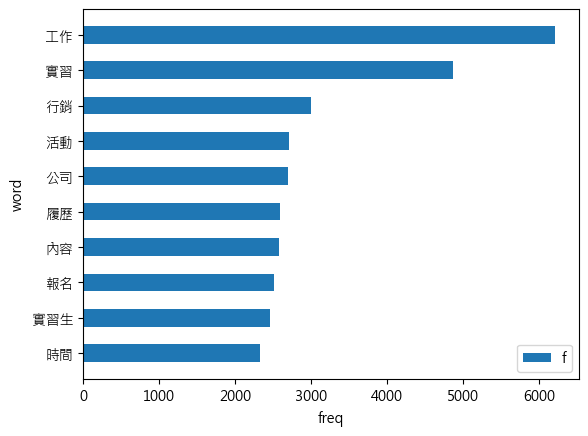

In [27]:
fig, ax = plt.subplots()
tmp = ptt_articleFreq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(ptt_articleFreq_df['freq'][:10]), 
        height=0.5, 
        align='center',
        label='freq')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

<Figure size 640x480 with 0 Axes>

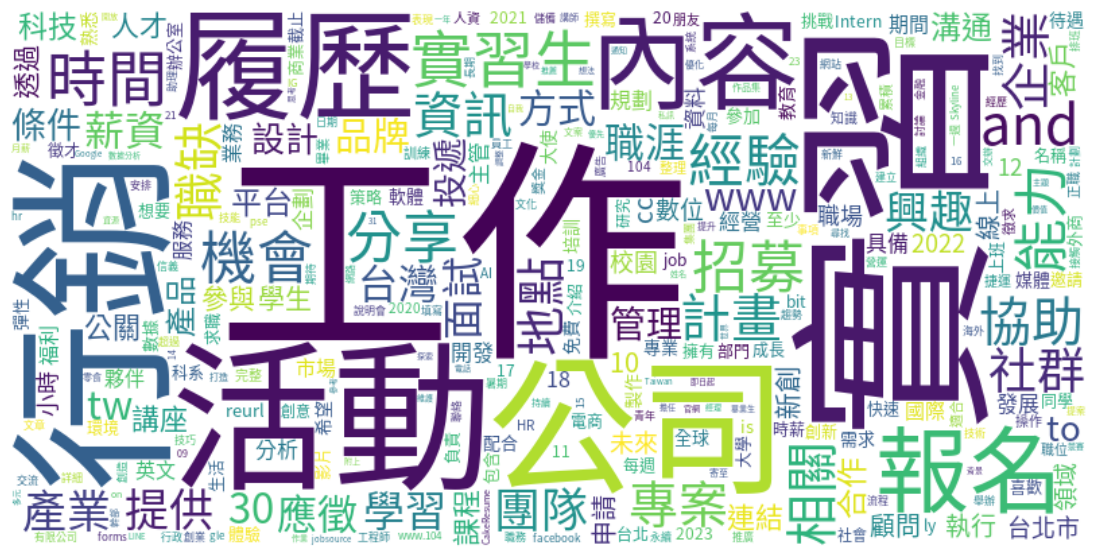

In [28]:
# Generate a word cloud image
font_path = './SourceHanSansTW-Regular.otf'
cloud = WordCloud(max_words=300, background_color="white",width=800, height = 400, font_path=font_path, colormap='viridis')
cloud.generate_from_frequencies({w[1]['word'] : int(w[1]['freq']) for w in ptt_articleFreq_df.iterrows()})
# Áπ™Âúñ
plt.figure()
plt.figure(figsize=(14,7))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### ÊßãÈù¢Â≠óÂÖ∏

In [4]:
dict_ = pd.read_csv('ÊßãÈù¢Â≠óÂÖ∏-new.csv')
dict_['alias'] = dict_['alias'].apply(lambda x : x.split("|"))
dict_cate = pd.DataFrame(dict_.groupby("class", sort=False)['alias'].apply(lambda x:np.concatenate(list(x))).reset_index())
dict_cate = dict_cate.reset_index()
dict_cate['alias'] = dict_cate['alias'].apply(lambda x : "|".join(x))
dictionary  = dict_cate.set_index("class")["alias"].to_dict()
dictionaryList = list(dictionary.keys())
dictionaryList

['Ëñ™Ë≥á',
 'Á¶èÂà©',
 'Â∑•ÊôÇ',
 'Áî¢ÂìÅ',
 'Âª£Âëä',
 '‰∫∫ÊâçÊãõÂãü',
 'ÁßëÁ≥ªÂ∞àÊ•≠',
 'ÊàêÈï∑ÂÉπÂÄº',
 'Á∂ìÊøüÂ†±ÈÖ¨',
 '‰∫∫ÈöõÂÉπÂÄº',
 'ÁµÑÁπîÂÆâÂÖ®ËàáÂÆâÂÆö',
 'ËÆäÂåñÊÄß',
 'Áî¢ÂìÅËàáÊúçÂãô',
 'ÂÖ¨Âè∏ÊñáÂåñËàáÂÉπÂÄº',
 'ÊãõÂãüË≥áË®ä',
 'ÊãõÂãü‰∫∫Âì°',
 'ÊÉÖÁ∑í']

#### ÂÖ¨Âè∏ÂÖßÂ§ñÂ≠óÂÖ∏

In [5]:
df = df_[(df_.date > '2021-01-01') & (df_.date < '2023-5-6')].reset_index(drop=True)

In [6]:
firm_dict = {
    'in-firm' : 'Ë£ïÈöÜÊó•Áî¢Ê±ΩËªä|Ë£ïÈöÜÊ±ΩËªä|‰∏≠ËèØÊ±ΩËªä|Á¥çÊô∫Êç∑Ê±ΩËªä|È¥ªËèØÂÖàÈÄ≤|Ê†º‰∏äÁßüËªä|Ë£ïËûç‰ºÅÊ•≠|Nissan|NISSAN|LUXGEN|Luxgen',
    'out-firm' : 'ÂíåÊ≥∞Ê±ΩËªä|‰∏≠ËèØË≥ìÂ£´|Ê±éÂæ∑Ê∞∏Ê•≠|Â§™Âè§Ê±ΩËªä|ÂåØË±êÊ±ΩËªä|‰∏≠ËèØÊ±ΩËªä|Á¶èÁâπÂÖ≠Âíå|Âè∞ÁÅ£Êú¨Áî∞|È¥ªËèØÂÖàÈÄ≤|ÂúãÁëûÊ±ΩËªä|‰∏âÈôΩÂ∑•Ê•≠'
}

In [7]:
df_infirm = df[df.content.str.contains(firm_dict["in-firm"])].reset_index(drop=True)
df_outfirm = df[df.content.str.contains(firm_dict["out-firm"])].reset_index(drop=True)
print(df_infirm.shape)
print(df_outfirm.shape)

(2, 8)
(7, 8)


In [8]:
df_infirm.loc[1,'Url']

'https://mbasic.facebook.com/groups/849299568575237/permalink/2014401552065027/?refid=18&_ft_=encrypted_tracking_data.0AY9lhOohnu3aN1U6b3ZNR2-uelLik1xiYtpg1DrvC-u6YKb6E8uihNWv48C7976-XG1C_XhQTT5vEmOvHaF9y1MwVOW7DhaqEAo72E1qtQ8g3Zg8N6X-kMTgtusskIRU8TW3GkUHKMZhiEIP73mJaqHno8Xfoj9o_Gd6GjQ92WiM2sSG7ZyuqlfDQgZHd3VFAiF2AzNej2wqMiN1noXJY25Gizys0QUShjlj08rjy1YGTdGwwIGSwFcOaNnk-QGUUhKKbtTzvTBf9hm_RYzsLusLlhXLGAWfCuTLU6Ozt9WmK57N2leTnntuVskU9TK52xsQlWgKTg4_K8s4nemY_Tjd-peoBb3zmqIF8-zO7td8X-EcOaT_rj4URIXjvE3cgaZZRDdBbfcQICiO-doK7qa24M5uGnn9DPUI-zAFGOWWGGulkwlG1rXZTH5sWLzlkIEdAXFhKQZOr90eKRNRiuDVnQegeHXHxFuOztyJXDFAKy6NCdFlIv7xPZA-SdmCVxOHQqCqYidvETb9jBPyDa0pnc8_vSsU_dAjbcq3nEmWn4DQlczQTnOa9AD8uYCQef_zpFmQXU6Ro5nD7CHmxo7ZIhdk5ER3ZSa6Bbs4v4gyKdlsU6MtspJ3DzwMZVVat55umuxmDX0MV9Wv_PoL8nhUfq8kWdlnr0qxftAAjeikiBPoHMMnL4bL9O9O3nPeYqS7yBSNqaJNLXSoGyb63sHbwHRc6XWqvzwnySqHC0NcKgpzENlXgQaEMYqNBX0dWmPXGDxkScjZYGCxB8ETdVQS61BDBzp1_gF1BuhkAtyI4K_iFKrM2FVyYfe5UwosoMBsk-8Tp_IpPcw2t0Fu7MnUL3gxBgXKU4c-eaQAFM3CaZi9J

In [122]:
df_infirm.loc[0,'Url']

'https://mbasic.facebook.com/groups/849299568575237/permalink/2296243227214190/?refid=18&_ft_=encrypted_tracking_data.0AY8foJoKDCHC9p7sUXDgyyVFFkV0IeDXiGJL2J4VTjs8tpv2uzZjAFj9QPCWClOUqFkGWX4FA0tLPbSePjDMBni8kTJAznu2-nmYLnFAeZyZfe9mvXhZBpd6ZunO2W07iUrvCndguS62jinqmYYlJU5_4ewUVHSimC0nxGuZK4gqdf_IH03Hb1pjxt6qK0u_l57xzVIA7z1yfla-t2NmwzJ0mCPwaIPLkgXuefXTc79LD4nfGXKn3-BWZjojbsV6468aaKCiGwmo9erVtkxCiewcJjmKFIDVPQCXUY-KWMiz_6CeuYkIZPcwX0_sfD3sX6DqSjERgPhjWf5vEFnW2z15eyqEc_3DYH4g0JSBJrgp7dl0SpvSPHy-78fN5ZOzYLsKAVv8Ccp6TQSKztrQp58x4z0tlJ4T5-SgyF0Hye7D-OfOHk2HMk8DpjBAwOUUOO2oLpLFX7aqU2k3lSSfdCm2zIbyNzwZmVXkslGIkw4iu2riE9-emhYbQN2NXSHdmp_lM5aSYE3cg5DU4uQ9tny_zaJDtHY3SknnGQvz8nuACbEV8trCyGrb8RDW5KiYznZgdV8cBzpfZ0S1vjbuZP8hQC7M1l6E8Xgsd2vNsqdwWKSXTYI_9Rho8Z5ISGj6DP8m_f-y1FCuCEXur1D0R56NC165-HOusGFrRDia2o2itz8cOYSJoWnHF4exa5--NLQdw7dyZf5w26-hOgnS6b0zAlJxOskqtx45Kj890Brlh8hZxm6Cvm2ozCxqrn8UJQj06238snXmO18vsH7zzirw3XGS_RHTt2dJjVzIrIW4lDHS6VRF6LJ1tsTy2rJWeMXVDzKa6M1g5JQwOA9yeaNW_UrapiXxdhJhCJvnnoPf1lZM1

In [117]:
df_outfirm['comment_num'].sum()

1

In [32]:
pd.to_datetime(df_['date']).max()

Timestamp('2023-05-08 00:00:00')

In [34]:
df_[(df_.date > '2020-01-01') & (df_.date < '2020-12-10')].reset_index(drop=True).shape

(562, 9)

In [35]:
df_[(df_.date > '2021-01-01') & (df_.date < '2021-12-10')].reset_index(drop=True).shape

(821, 9)

In [39]:
df_[(df_.date > '2021-01-01') & (df_.date < '2023-5-6')].reset_index(drop=True).shape

(2521, 9)

In [104]:
df_outfirm.to_csv('./ÂØ¶ÁøíÂøÉÂæó/outfirm.csv', encoding='utf-8-sig')

In [118]:
df_tmp = df_outfirm[~df_outfirm['comments'].isna()]

In [119]:
df_tmp

date                                                Url  \
6  2021-04-27  https://mbasic.facebook.com/groups/84929956857...   

                                             content  reaction_like_count  \
6  üì£ÂíåÊ≥∞Ê±ΩËªä2021Âπ¥ÊöëÊúüÂØ¶ÁøíÁîüüì£ÁÜ±ÁÉàÊãõÂãü‰∏≠üî•„ÄÇ ÂíåÊ≥∞Ê±ΩËªäÁÇ∫TOYOTA„ÄÅLEXUS„ÄÅHINO...                   26   

   comment_num poster                                          posterUrl  \
6            1    Èô≥Ê≠£Ëä¨  https://mbasic.facebook.com/fanninchen?eav=AfY...   

                                            comments  \
6  [{'poster': 'ËåÉÁëûÊ¥ã', 'posterUrl': 'https://mbasi...   

                                           sentences  
6  [üì£ÂíåÊ≥∞Ê±ΩËªä2021Âπ¥ÊöëÊúüÂØ¶ÁøíÁîüüì£ÁÜ±ÁÉàÊãõÂãü‰∏≠üî•,  ÂíåÊ≥∞Ê±ΩËªäÁÇ∫TOYOTA„ÄÅLEXUS„ÄÅHI...

In [60]:
df_outfirm[~df_outfirm['comments'].isna()].loc[12,'Url']

'https://mbasic.facebook.com/groups/849299568575237/permalink/2121072714731243/?refid=18&_ft_=encrypted_tracking_data.0AY_o7evwJAfFkt3N8pB2RmI96S5CTXxBw7TNzFEiP1ZIBC4SahKX_0SC8aQXaJiFSsL6Xvn6X0njGuTs_F1I9ilLIBlA85s5sQrmsT9WZ_3ZrKIgrRrKLUg1Cdusm46BSgi65zJZO6vKs7-RGIC1Q6x6fAHHmrR1wLISsr5uBeOi-ut59oltOmb5f0MENZjb76MvcIiSItDJO8VA0m4WNwOQqErcS5az0sIt7T8TBxXr073EvWr1cN658UmyeuIgs5QUQ11GpkXgcHqQLdaCrEDBDsDHiLJOdipGA2FdijAAb-QeE-Sdb3TkkfGK9qhf6-nA0M47KQc2qwU4bzT5nBf78o0Q43rVWcu1UpMAUJmGudfgoiE3tx06q46pAf7ZvYUQjB7ONESMsbMe3sGXmLVSGgONkNEH5CuDMp_kDHPCZ7bi0R2_0bDJoeNF2gXwCcgqYAPTcPMuAGsLgi5NZIi_V6YN1Tje6C4_YBBhqBvujZ5VWkyMKQNwt7lorXDEXIa-xHoL1DOSjiqwIqFmthO7-49IR5SglzW0cZfxlnZmOvU2KW8d0M8Fm3nFB3MWAjdjsq-gIjGXN2jrAMuiR37IQ-CuZ_RqpAtL7wwHL0_D-v_OoGfN0h38W8Zi62mzv5PtjEBTCgxjqYcPV9v5dc-PXoi98dJd2NWOJX_5lyErhAoF249ujGZrZCmhe_-8uKIsMiYe7QnJs8wyWlCFZvJrb68s_LwtR-ioYbQGbTuKdx0FiBckaegoOE8ZLidmBYdFkiEEf-_jvmj17VnD3LT4VyUcNAOKr-3UqTMzV3JpXJx47fu39bC1K7dLPssEp2mlmob8aAaB1FWp-jazlNcl_d-MG0jN3nijjbXcng5lFGplH

In [30]:
def get_comment(dataList):
    text = []
    dataList = eval(dataList)
    for data in dataList:
        text.append(data['comment'])
    return '„ÄÇ'.join(text)

In [32]:
segmentation_used_note = (";", "Ôºõ", "ÔºÅ", "!", "Ôºü", "?", "„ÄÇ")
def comment_segmentation(df, target_column, segment_symboles=[]):
    regexPattern = '['+'|'.join(segment_symboles)+']'
    sentenceCheckRegexPattern = '[,|.| |\t|\n]'

    result = []
    
    for row_dict in df.to_dict(orient="records"):
        sentences = re.split(regexPattern, row_dict[target_column])
        count = 1
        for sent in sentences:
            # if re.sub(sentenceCheckRegexPattern, "", sent):
            temp = row_dict.copy()
            del temp[target_column]
            temp["comment_idx"] = str(count)
            temp["comment"] = sent
            result.append(temp)
            count +=1
    df = pd.DataFrame(result)
    return df

In [31]:
df_comment = df_[~df_['comments'].isna()]
df_comment.reset_index(drop='index',inplace=True)

In [34]:
df_comment['comments_text'] = df_comment['comments'].apply(lambda x : get_comment(x))

c:\Users\User\anaconda3\envs\text_\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_comment_s = comment_segmentation(df_comment,'comments_text',list(segmentation_used_note))
df_comment['comment'] = df_comment_s.groupby('Url', sort=False)['comment'].apply(list).tolist()


c:\Users\User\anaconda3\envs\text_\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
df_comment_s = df_comment_s[df_comment_s['comment']!='']
df_comment_s.reset_index(drop='index',inplace=True)

In [53]:
df_comment_s['word'] =df_comment_s.comment.apply(getToken)
df_comment_s = df_comment_s.explode('word') # Â∞áwordÊ¨Ñ‰ΩçÂ±ïÈñã
df_comment_s.head()

date                                                Url  \
0  2023-05-08  https://mbasic.facebook.com/groups/84929956857...   
1  2023-05-08  https://mbasic.facebook.com/groups/84929956857...   
2  2023-05-01  https://mbasic.facebook.com/groups/84929956857...   
2  2023-05-01  https://mbasic.facebook.com/groups/84929956857...   
3  2023-05-01  https://mbasic.facebook.com/groups/84929956857...   

                                             content  reaction_like_count  \
0  ÂìàÂõâÂ§ßÂÆ∂Â•ΩÔºÅÊàëÊòØ Yourator ÁöÑÂØ¶ÁøíÁîü Fiona ‰ªäÂ§©ÊÉ≥ÂíåÂ§ßÂÆ∂ÂàÜ‰∫´ üöÄ#Yourat...                    3   
1  ÂìàÂõâÂ§ßÂÆ∂Â•ΩÔºÅÊàëÊòØ Yourator ÁöÑÂØ¶ÁøíÁîü Fiona ‰ªäÂ§©ÊÉ≥ÂíåÂ§ßÂÆ∂ÂàÜ‰∫´ üöÄ#Yourat...                    3   
2  „ÄêNGOÂØ¶Áøí„Äë #NGOÂØ¶Áøí #Âú∞ÊñπÂâµÁîü #internship #ÂØ¶ÁøíÂñÆ‰ΩçÔºöÁ§æÂúòÊ≥ï‰∫∫Êñ∞Á´πÁ∏£...                    4   
2  „ÄêNGOÂØ¶Áøí„Äë #NGOÂØ¶Áøí #Âú∞ÊñπÂâµÁîü #internship #ÂØ¶ÁøíÂñÆ‰ΩçÔºöÁ§æÂúòÊ≥ï‰∫∫Êñ∞Á´πÁ∏£...                    4   
3  „ÄêNGOÂØ¶Áøí„Äë #NGOÂØ¶Áøí #Âú∞ÊñπÂâµÁîü #internship #ÂØ¶ÁøíÂñÆ‰ΩçÔºöÁ§æÂúòÊ≥ï‰∫∫Êñ∞Á´πÁ∏£...                    4   

   comment_num  poster                                          posterUrl  \
0            2      ÈÑ≠Ëà´  https://mbasic.facebook.com/profile.php?id=100...   
1            2      ÈÑ≠Ëà´  https://mbasic.facebook.com/profile.php?id=100...   
2            3  Ja Hsu  https://mbasic.facebook.com/ja.hsu1?eav=AfZa0f...   
2            3  Ja Hsu  https://mbasic.facebook.com/ja.hsu1?eav=AfZa0f...   
3            3  Ja Hsu  https://mbasic.facebook.com/ja.hsu1?eav=AfZa0f...   

                                            comments  \
0  [{'poster': 'ÊùéÊâøÊ¥ã', 'posterUrl': 'https://mbasi...   
1  [{'poster': 'ÊùéÊâøÊ¥ã', 'posterUrl': 'https://mbasi...   
2  [{'poster': 'ÊùéÂçöËèØ', 'posterUrl': 'https://mbasi...   
2  [{'poster': 'ÊùéÂçöËèØ', 'posterUrl': 'https://mbasi...   
3  [{'poster': 'ÊùéÂçöËèØ', 'posterUrl': 'https://mbasi...   

                                           sentences    comment comment_idx  \
0  [ÂìàÂõâÂ§ßÂÆ∂Â•Ω, ÊàëÊòØ Yourator ÁöÑÂØ¶ÁøíÁîü Fiona ‰ªäÂ§©ÊÉ≥ÂíåÂ§ßÂÆ∂ÂàÜ‰∫´ üöÄ#Your...          Êé®           1   
1  [ÂìàÂõâÂ§ßÂÆ∂Â•Ω, ÊàëÊòØ Yourator ÁöÑÂØ¶ÁøíÁîü Fiona ‰ªäÂ§©ÊÉ≥ÂíåÂ§ßÂÆ∂ÂàÜ‰∫´ üöÄ#Your...         Êé®Êé®           2   
2  [„ÄêNGOÂØ¶Áøí„Äë #NGOÂØ¶Áøí #Âú∞ÊñπÂâµÁîü #internship #ÂØ¶ÁøíÂñÆ‰ΩçÔºöÁ§æÂúòÊ≥ï‰∫∫Êñ∞Á´π...    Êé®ÂÄãËÄÅÈóÜ‰∫∫ÂæàÂ•Ω           1   
2  [„ÄêNGOÂØ¶Áøí„Äë #NGOÂØ¶Áøí #Âú∞ÊñπÂâµÁîü #internship #ÂØ¶ÁøíÂñÆ‰ΩçÔºöÁ§æÂúòÊ≥ï‰∫∫Êñ∞Á´π...    Êé®ÂÄãËÄÅÈóÜ‰∫∫ÂæàÂ•Ω           1   
3  [„ÄêNGOÂØ¶Áøí„Äë #NGOÂØ¶Áøí #Âú∞ÊñπÂâµÁîü #internship #ÂØ¶ÁøíÂñÆ‰ΩçÔºöÁ§æÂúòÊ≥ï‰∫∫Êñ∞Á´π...  Yu Rou Wu           3   

  word  
0  NaN  
1   Êé®Êé®  
2   Êé®ÂÄã  
2   ËÄÅÈóÜ  
3   Yu

In [54]:
ptt_commentFreq_df = pd.DataFrame(df_comment_s['word'].value_counts())
ptt_commentFreq_df = ptt_commentFreq_df.reset_index()
ptt_commentFreq_df.columns = ['word', 'freq']
ptt_commentFreq_df

word  freq
0        Êé®Êé®   358
1     https   127
2       com    73
3        ÂØ¶Áøí    70
4        Â†±Âêç    63
...     ...   ...
2759    ENS     1
2760   Â∏´ÁØÑÂ≠∏Ê†°     1
2761     È´òÁ≠â     1
2762    Ëñ©ÂÖãÈõ∑     1
2763     ÊûóÊõ∏     1

[2764 rows x 2 columns]

In [55]:
stop_word_update = stopWords + ['https','com','www','and','to','in','the','for','with','of','00','000']
for index,token in enumerate(df_comment_s['word']):
    if token in stop_word_update:
        df_comment_s = df_comment_s[~df_comment_s['word'].isin([token])]
ptt_commentFreq_df = pd.DataFrame(df_comment_s['word'].value_counts())
ptt_commentFreq_df = ptt_commentFreq_df.reset_index()
ptt_commentFreq_df.columns = ['word', 'freq']
ptt_commentFreq_df

word  freq
0       Êé®Êé®   358
1       ÂØ¶Áøí    70
2       Â†±Âêç    63
3       Â±•Ê≠∑    57
4       ËààË∂£    46
...    ...   ...
2753   ENS     1
2754  Â∏´ÁØÑÂ≠∏Ê†°     1
2755    È´òÁ≠â     1
2756   Ëñ©ÂÖãÈõ∑     1
2757    ÊûóÊõ∏     1

[2758 rows x 2 columns]

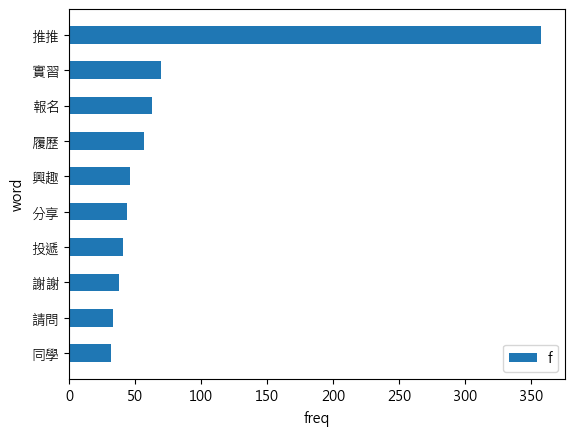

In [56]:
fig, ax = plt.subplots()
tmp = ptt_commentFreq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(ptt_commentFreq_df['freq'][:10]), 
        height=0.5, 
        align='center',
        label='freq')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

<Figure size 640x480 with 0 Axes>

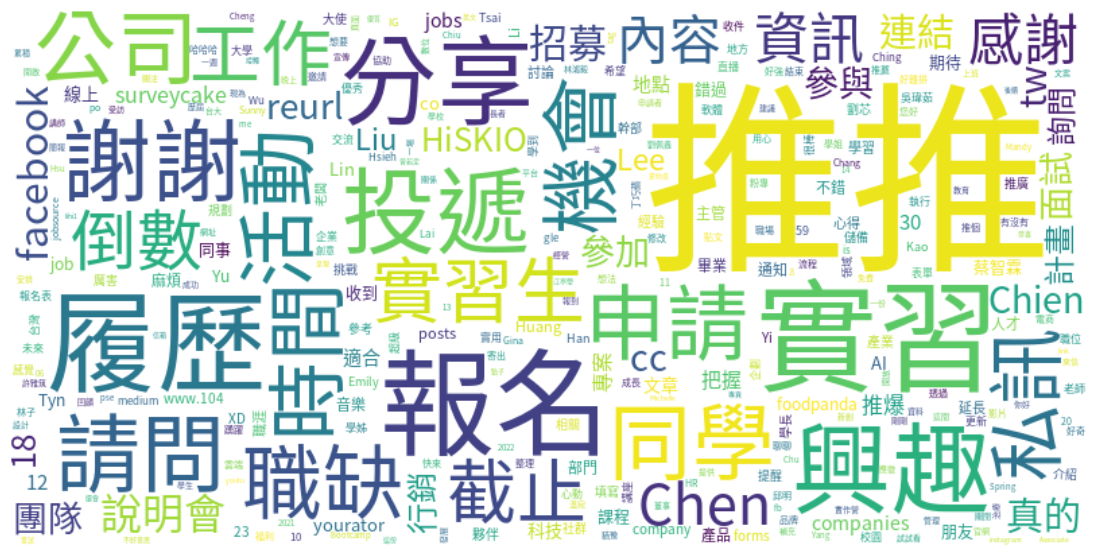

In [57]:
# Generate a word cloud image
font_path = './SourceHanSansTW-Regular.otf'
cloud = WordCloud(max_words=300, background_color="white",width=800, height = 400, font_path=font_path, colormap='viridis')
cloud.generate_from_frequencies({w[1]['word'] : int(w[1]['freq']) for w in ptt_commentFreq_df.iterrows()})
# Áπ™Âúñ
plt.figure()
plt.figure(figsize=(14,7))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()